<a id="top" style="float:left;" href="http://dynfluid.ensam.eu/"><img style="height:80px;" src="https://hpp.education/Lessons/docet.png"/></a>
<a style="float:right;" href="http://www.cnam.fr//"><img style="height:80px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>

<center>
<h3 style="color:#888888;"> <i>--  AER004: Mécanique des fluides appliquée  --</i> </h3>
<h1> TN n°2 </h1>
<h3> Calcul de Débit </h3>
<h6><a href="mailto:simon.marie@lecnam.net">simon.marie@lecnam.net</a></h6>
</center>

Les frottements dus à la viscosité dans un écoulement en conduite engendrent une vitesse nulle à la paroi et une vitesse maximal au centre de la conduite. Pour calculer le débit volumique dans la conduite, il faut alors tenir compte de la variation de vitesse. Pour cela on peut par exemple calculer le débit volumique $q(r)$ sur une tranche annulaire de rayon $r$ et d'épaisseur $dr$ donc de section $s(r)=2\pi r dr$, soit:

$$
q(r)=U(r)s(r)=2\pi r U(r) dr
$$



<img src="https://hpp.education/Lessons/MecaFlu_L2/Files/Conduite_debit.png"/>







Le débit total $Q_v$ dans la conduite est donc la somme de tous les débits $q(r)$ entre $r=0$ et $r=R$ soit:

$$
Q_v=\int_0^R q(r)=\int_0^R 2\pi r U(r) dr
$$

La vitesse débitante est alors obtenue en divisant le débit volumique $Q_v$ par la section $S$ de la conduite:

$$
U_q=\dfrac{1}{S}Q_v=\dfrac{1}{S}\int_0^R 2\pi r U(r) dr
$$

 Dans certains cas on peut établir une relation analytique décrivant l'évolution de la vitesse en fonction de la distance $r$ au centre de la conduite. A faible nombre de Reynolds (Ecoulement laminaire) on a:

$$
U(r)=U_0\left(1-\dfrac{r^2}{R^2} \right)
$$

où $U_0$ est la vitesse maximale au centre et $R$ le rayon de la conduite. Dans ce cas (Cf TD), on peux démontrer en calculant l'intégral que $U_q=U_0/2$. 

Cependant, pour la majorité des écoulements, nous ne pouvons pas obtenir une expression analytique de la vitesse débitante. Il est donc utile de savoir calculer un débit volumique à partir d'un relevé de vitesse à différentes position de la section. Supposons que nous ayons le relevé suivant:

<table>
<tr><td>$r$</td><td>$0$</td><td>$0.1$</td><td>$0.2$</td><td>$0.3$</td><td>$0.4$</td><td>$0.5$</td><td>$0.6$</td><td>$0.7$</td><td>$0.8$</td><td>$0.9$</td><td>$1.0$</td></tr>
<tr><td>$U(r)$</td><td>$1$</td><td>$0.99$</td><td>$0.96$</td><td>$0.91$</td><td>$0.84$</td><td>$0.75$</td><td>$0.64$</td><td>$0.51$</td><td>$0.36$</td><td>$0.19$</td><td>$0$</td></tr>
</table>

Regardons comment calculer numériquement le débit dans cette conduite à l'aide de quelques lignes de Python. Pour ceux qui ne seraient pas familier avec le language python, vous pouvez consulter le Notebook <a href="https://hpp.education/Python/Intro_python.html">Introduction au Python</a>. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
fs=22
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
%matplotlib inline

On commence par rentrer les données sous forme de vecteur, puis on trace $U(r)$ et $U(-r)$.

In [3]:
r=np.arange(0,1.1,0.1)
U=np.array([1.,0.99,0.96,0.91,0.84,0.75,0.64,0.51,0.36,0.19,0])

Text(0, 0.5, '$r$')

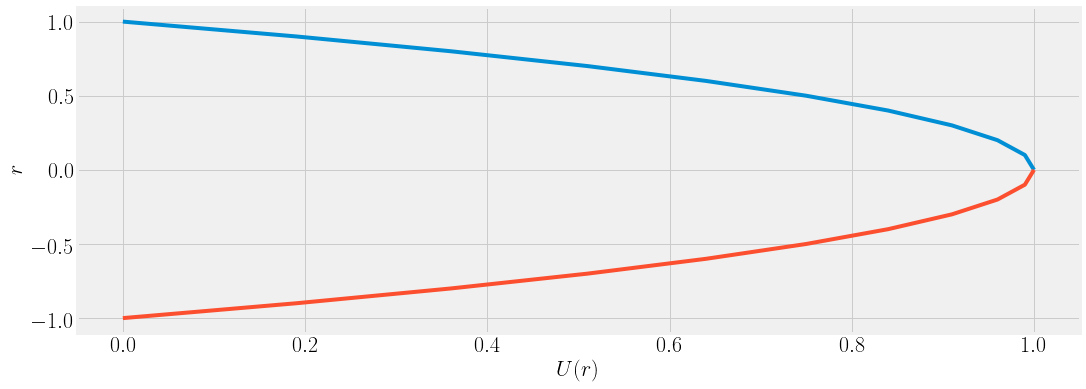

In [4]:
fig=plt.figure(figsize=(16,6))
plt.plot(U,r);plt.plot(U,-r)
plt.xlabel('$U(r)$',fontsize=fs)
plt.ylabel('$r$',fontsize=fs)

Pour calculer le débit total $Q_v$, il suffit de calculer chaque débit $q(r)$ associé à chaque colonne du relevé et d'évaluer l'intégrale donnée plus haut par la méthode des rectangles.

D'abord on calcul les $q(r)$:

In [5]:
qr=2.*np.pi*r*U
print(qr)

[0.         0.62203535 1.20637158 1.71530959 2.11115026 2.35619449
 2.41274316 2.24309715 1.80955737 1.07442469 0.        ]


Pui on calcul l'intégrale par la méthode des rectangles: 
$$
\int q(r) dr \sim \Delta r \sum q(r)
$$

In [6]:
Q=0.1*np.sum(qr)
print(Q)

1.5550883635269477


On en déduit $U_q=\dfrac{Q}{\pi R^2}$, soit pour $R=1$:

In [7]:
Uq=Q/np.pi
print(Uq)

0.49500000000000005


On peut également utiliser la fonction <i>trapz(y,x)</i> de numpy qui utilise la méthode des trapèzes pour l'évaluation d'une intégrale:

In [8]:
Uq2=np.trapz(qr,r)/np.pi
print(Uq2)

0.49500000000000005


## Conclusion

On pourra essayer de faire varier le nombre de point utilisé pour le calcul (en prenant un point sur deux par exemple) et regarder l'influence sur le résultat.

Vous pouvez ensuite rédiger une synthèse des éléments que vous avez apris dans ce TN

In [1]:
from IPython.core.display import HTML
style=open('notebooks.css', "r").read()
HTML(style)

<a id="top" style="float:left;" href="http://dynfluid.ensam.eu/"><img style="height:80px;" src="https://hpp.education/Lessons/docet.png"/></a>
<a style="float:right;" href="http://www.cnam.fr//"><img style="height:80px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center><a href="#top">Retour en haut de la page</a></center>